In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import bernoulli
samples = []
for i in range(20):
    samples.append( bernoulli.rvs(size=10000,p=.8) )
samples = pd.Series(samples)

`A.` Calculate the likelihood for the first sample under 4 different Bernoulli models: p = .2, p=.4, p=.6, p=.8 (remember, likelihood is sum of the logs of the probabilities of each of hte observations). Describe the likelihood results. Is it what you expect? Which is the most likely model?

In [59]:
four = [0.2, 0.4, 0.6, 0.8]
# in a list define the different model probabilities
model_x = []
# create empty list

for x in four:
    # moves between each of our four probabilities
    a1 = bernoulli.pmf(samples[0],p=x)
    # for each probability x we create an array of probabilities for each item in our sample
    a2 = np.log(a1)
    # we take the log of every value in the array
    model_x.append(a2.sum() * -1)
    # adds the array to the list (times by -1)

print(model_x)
# prints our empty list

## I think that the 0.8 list should fit closely with our sample as the sample was created at 0.8, of corse because we only have 30 units of data there can be significant stray.

[13449.329483324245, 8389.279892471171, 5881.883663930284, 4876.485154158849]


`B.` For each of the 4 different models, calculate the likelihood for all 20 samlpes, and make a histogram of the distribution of the likelihoods  (4 separate histograms is ok, nothing fancy) Explain/interpret the results. What is different? Which model is most likely and how ccan you see that in the histograms?

,0,1,2,3
0,13449.329483,8389.279892,5881.883664,4876.485154
1,13299.609692,8345.489661,5925.673896,5026.204945
2,13327.335580,8353.598963,5917.564593,4998.479058
3,13460.419838,8392.523613,5878.639943,4865.394799
4,13259.407156,8333.731173,5937.432384,5066.407482
5,13270.497511,8336.974894,5934.188663,5055.317127
6,13424.376185,8381.981521,5889.182036,4901.438453
7,13373.083293,8366.979312,5904.184245,4952.731344
8,13429.921362,8383.603381,5887.560175,4895.893275
9,13252.475684,8331.703847,5939.459709,5073.338953


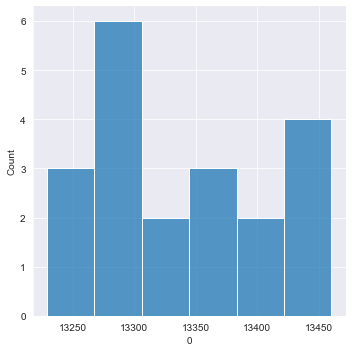

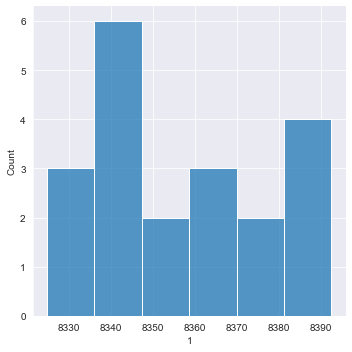

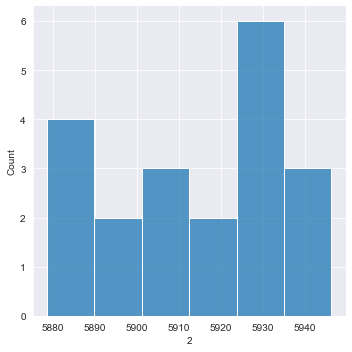

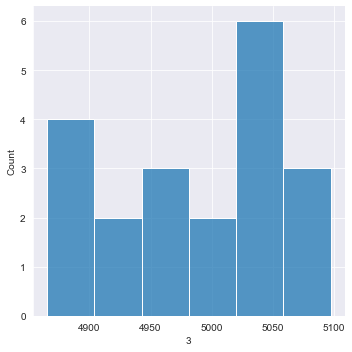

In [60]:
four = [0.2, 0.4, 0.6, 0.8]
# in a list define the different model probabilities
d = {}
# create empty dictionary
for n in range(samples.count()):
    # moves between zero and the number of samples -1 creating an int called n
    # there is a faster way to do this
    model_x = []
    # every time we move to a new n we create a new empty list
    for x in four:
        # moves between each of our four probabilities
        a1 = bernoulli.pmf(samples[n],p=x)
        # for each probability x we create an array of probabilities for each item in our sample
        a2 = np.log(a1)
        # we take the log of every value in the array
        model_x.append(a2.sum() * -1)
        # adds each array (times by -1) of probabilities for each probabilty to the list for the sample
    d[n] = model_x
    # adds each list for each sample to our dictionary of all samples
df = pd.DataFrame(d).transpose()
# transforms our dictuionary to a dataframe (transpose is used because our x and y are flipped)
#print(df)
# print to check dataframe
sns.displot(data=df, x=0)
sns.displot(data=df, x=1)
sns.displot(data=df, x=2)
sns.displot(data=df, x=3)
# creats a histogram for each column (probability) in our dataframe

## As I predicted in the last question I predict again that the 0.8 will be most like the sample.
## I have no idea why my histogram looks the same I reset the data and did the same thing again, I looked over my code and cant figure out why either way.
df